Problem 1: Guitar Hero Path Finding (Uniform Cost
Search)

In [24]:
#a) Implementation – Uniform Cost Search

import heapq

def uniform_cost_search(grid):
    rows, cols = len(grid), len(grid[0])

    note_rows = [any(cell == 1 for cell in row) for row in grid]

    pq = []
    visited = {}

    for col in range(cols):
        penalty = 5 if note_rows[0] and grid[0][col] == 0 else 0
        heapq.heappush(pq, (penalty, 0, col, [(0, col)]))

    while pq:
        cost, row, col, path = heapq.heappop(pq)

        if row == rows - 1:
            return cost, path

        if (row, col) in visited and visited[(row, col)] <= cost:
            continue
        visited[(row, col)] = cost

        next_row = row + 1
        for next_col in range(cols):
            move_cost = abs(next_col - col)
            penalty = 5 if note_rows[next_row] and grid[next_row][next_col] == 0 else 0
            total_cost = cost + move_cost + penalty
            heapq.heappush(pq, (total_cost, next_row, next_col, path + [(next_row, next_col)]))

    return -1, []


In [28]:
grid = [
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
]


cost, path = uniform_cost_search(grid)
print("Minimum Cost:", cost)
print("Path:", path)


Minimum Cost: 3
Path: [(0, 1), (1, 0), (2, 2)]


b) Time & Space Complexity Analysis

M = number of rows, N = number of columns

Time Complexity:
worst case, each of the M rows allows N choices

For each cell, we might explore up to N next columns

So total explored states ≈ O(M × N²)

Each state involves priority queue operations → O(log(M × N))

Total Time: O(M × N² × log(M × N))

Space Complexity:
Visited dictionary stores up to M × N entries → O(M × N)

Priority queue may also hold up to O(M × N) entries → O(M × N)

Final space: O(M × N)

c) What if Diagonal Moves Were Allowed

Currently, we only consider moving from any column in row r to any column in row r+1, which already includes diagonal movement implicitly

If explicit diagonal movement is allowed, with a cost of 1, we could restrict valid moves to:

Left-diagonal: (row+1, col-1)

Stay: (row+1, col)

Right-diagonal: (row+1, col+1)

This would change the loop:

for delta in [-1, 0, 1]:
    next_col = col + delta
    if 0 <= next_col < cols:
        ...


Time complexity would reduce from O(M × N²) to O(M × N)



Problem 2: Word Break (Dynamic Programming)

In [ ]:
# a) Dynamic Programming Implementation

def wordBreak(s, word_dict):
    n = len(s)
    dp = [False] * (n + 1)
    dp[0] = True

    for i in range(1, n + 1):
        for j in range(i):
            if dp[j] and s[j:i] in word_dict:
                dp[i] = True
                break

    return dp[n]


In [ ]:
s = "ilikeprogramming"
dictionary = {"i", "like", "program", "programming", "ming"}

result = wordBreak(s, dictionary)
print(result)


True


b) Filling the DP Table for "ilikeprogramming"

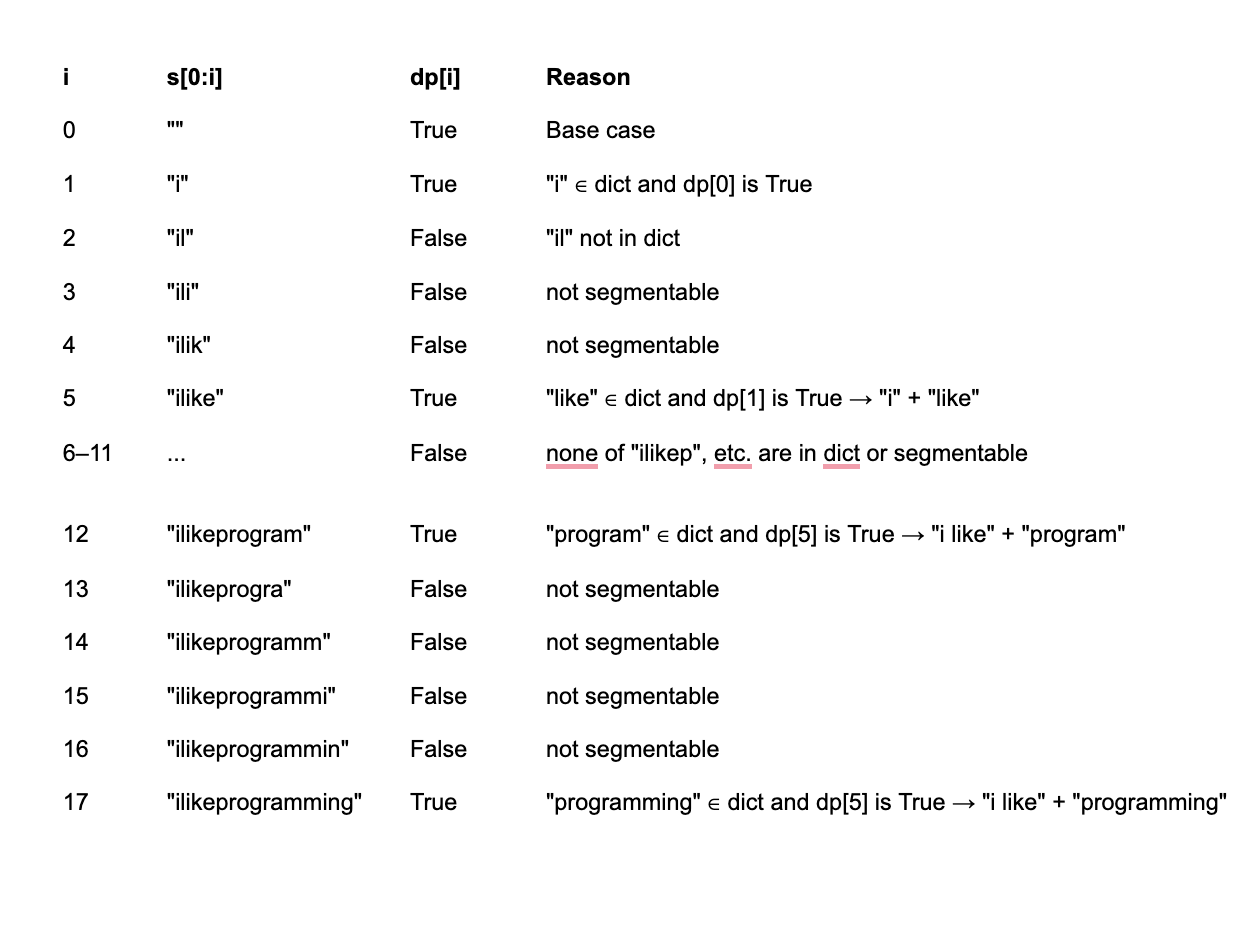

c) DP vs. Backtracking Comparison

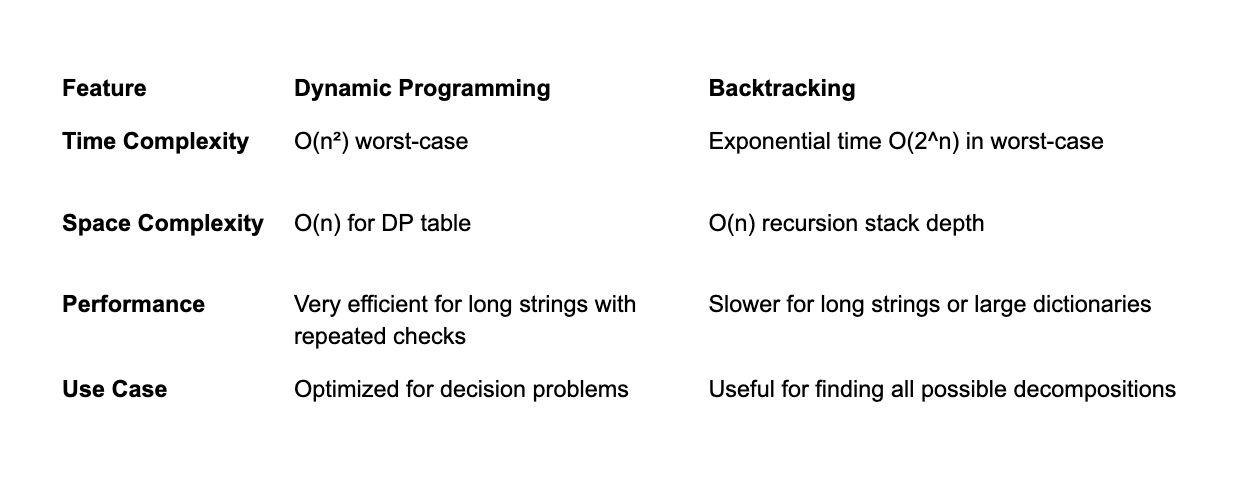


Dynamic Programming is significantly faster and more efficient than backtracking for this problem

Problem 3: Robot Navigation (Backtracking)

In [ ]:
#  a) Implement a backtracking algorithm to find all valid paths

def find_all_paths(grid):
    n = len(grid)
    items = set()
    start = None
    goal = None

    for i in range(n):
        for j in range(n):
            if grid[i][j] == 'S':
                start = (i, j)
            elif grid[i][j] == 'G':
                goal = (i, j)
            elif grid[i][j] == 'I':
                items.add((i, j))

    all_paths = []

    def backtrack(x, y, path, collected, visited):
        if not (0 <= x < n and 0 <= y < n) or grid[x][y] == 'X' or (x, y) in visited:
            return

        path.append((x, y))
        visited.add((x, y))

        if grid[x][y] == 'I':
            collected.add((x, y))

        if (x, y) == goal and collected == items:
            all_paths.append(list(path))
        else:
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                backtrack(x + dx, y + dy, path, collected.copy(), visited.copy())

        path.pop()

    backtrack(start[0], start[1], [], set(), set())
    return all_paths


In [ ]:
#  b) Modify to return only the shortest valid path

def find_shortest_path(grid):
    all_paths = find_all_paths(grid)
    if not all_paths:
        return None
    return min(all_paths, key=len)



c) What would change with limited battery life?

If the robot had limited battery life, we would need to:

Add a battery counter to the recursive function

Prune any path when battery == 0

Only continue paths if the remaining steps are enough to:

Reach remaining items

Reach the goal after collecting all items

In [ ]:
# Modified condition in backtracking

def backtrack(x, y, path, collected, visited, battery):
    if battery < 0:
        return
    ...
    for dx, dy in directions:
        backtrack(x + dx, y + dy, path, collected.copy(), visited.copy(), battery - 1)
